In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [47]:
import seaborn as sns
iris = sns.load_dataset('iris')

X = torch.tensor(iris[iris.columns[0:4]].values).float()
y = torch.zeros(len(X), dtype=torch.long)

y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [48]:
class NN(nn.Module):
    def __init__(self, input_size, output_size, num_Neurons, num_Layers) -> None:
        super().__init__()

        self.layers = nn.ModuleDict()
        self.num_Layers = num_Layers

        self.layers["input"] = nn.Linear(input_size, num_Neurons)

        for i in range(num_Layers):
            self.layers[f'hidden{i}'] = nn.Linear(num_Neurons, num_Neurons)

        self.layers['output'] = nn.Linear(num_Neurons, output_size)

    def forward(self, X):
        X = self.layers['input'](X)
        
        for i in range(self.num_Layers):
            X = F.relu(self.layers[f'hidden{i}'](X))
        
        X = self.layers['output'](X)
        return X

In [49]:
def train(model: nn.Module, learning_rate, epoches):

    criteria = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for _ in range(epoches):
        _y_pred = model(X)
        _loss = criteria(_y_pred, y)
        
        optimizer.zero_grad()
        _loss.backward()
        optimizer.step()
    
    y_pred = model(X)
    y_pred = torch.argmax(y_pred, axis=1)
    
    accuracy = 100 * torch.mean((y_pred == y).float())
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    return accuracy, num_params

In [50]:
NUM_NEURONS = 12
NUM_LAYERS = 4
EPOCHES = 2500
LEARNING_RATE = .01

model = NN(4, 3, NUM_NEURONS, NUM_LAYERS)
acc, _ = train(model, LEARNING_RATE, EPOCHES)
acc

tensor(97.3333)

## Experiment

In [67]:
NUM_LAYERS = range(1, 6)
NUM_NEURONS = np.arange(4, 101, 3)
EPOCHES = 1000
LEARNING_RATE = .01

# init output matrix
accuracies = np.zeros((len(NUM_NEURONS), len(NUM_LAYERS)))
params = np.zeros((len(NUM_NEURONS), len(NUM_LAYERS)))

for neuron_index in range(len(NUM_NEURONS)):
    for layer_idx in range(len(NUM_LAYERS)):
        _model = NN(4, 3, NUM_NEURONS[neuron_index], NUM_LAYERS[layer_idx])
        _acc, _num_params = train(_model, LEARNING_RATE, EPOCHES)

        accuracies[neuron_index, layer_idx] = _acc
        params[neuron_index, layer_idx] = _num_params

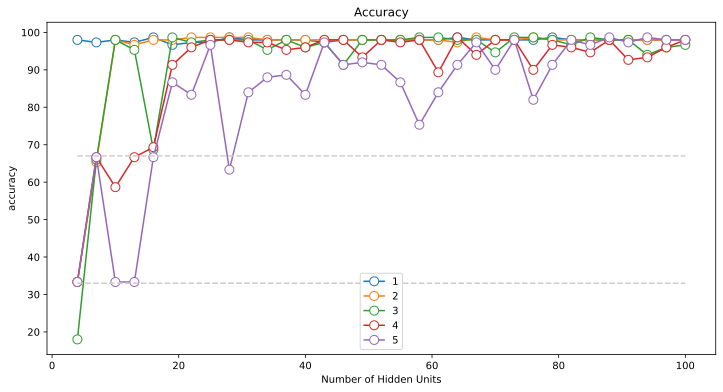

In [68]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(NUM_NEURONS, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(NUM_NEURONS[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot(NUM_NEURONS[[0, -1]], [67, 67], '--', color=[.8, .8, .8])
ax.legend(NUM_LAYERS)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')
plt.show()

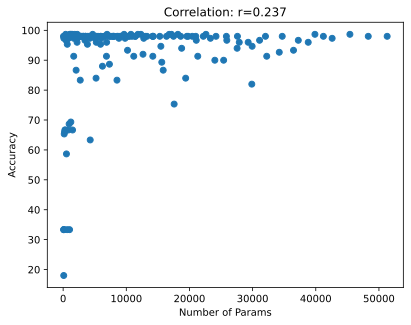

In [69]:
_x = params.flatten()
_y = accuracies.flatten()

r = np.corrcoef(_x, _y)[0, 1]

plt.plot(_x, _y, 'o')
plt.xlabel('Number of Params')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()